Introducción

En la era de la informática y el big data, el procesamiento de flujos de datos se ha convertido en una tarea fundamental. Los flujos de datos representan un tipo especial de datos que se generan continuamente en tiempo real y que presentan desafíos únicos en términos de análisis y modelado. La biblioteca River, una potente herramienta de aprendizaje automático en línea, proporciona soluciones efectivas para abordar estos desafíos.

En este trabajo, exploraremos el procesamiento de flujos de datos utilizando la biblioteca River en un contexto de predicción de enfermedades del corazón. Utilizaremos un conjunto de datos de Kaggle que contiene información clínica relevante para predecir enfermedades cardíacas. En este proceso, destacaremos el uso de ARF (Adaptive Random Forest), un modelo de clasificación en línea que se adapta de manera continua a los datos entrantes. También exploraremos la detección de drift mediante el detector ADWIN (Adaptive Windowing) y la detección de outliers para garantizar la robustez del modelo.

A lo largo de este trabajo, dividiremos el código en celdas y proporcionaremos explicaciones detalladas sobre cada componente, desde la inicialización del modelo hasta la gestión de drift y la importancia de la detección de outliers. Exploraremos cómo funciona el modelo ARF y cómo ADWIN identifica cambios en el flujo de datos. Además, discutiremos la importancia de la detección de outliers en la garantía de calidad y la integridad de los modelos de aprendizaje automático en línea.

Este trabajo servirá como una introducción práctica al procesamiento de flujos de datos con River y brindará una comprensión más profunda de los conceptos clave que sustentan esta tecnología.

En esta celda, se importan las bibliotecas necesarias. River se utiliza para crear y gestionar modelos de aprendizaje automático en línea, mientras que pandas se utiliza para cargar el conjunto de datos. También importamos ADWIN para la detección de drift y otras bibliotecas relacionadas con estadísticas y métricas.

In [9]:
from river.drift import ADWIN
from river import forest
from river import tree
import pandas as pd
from river import anomaly
from river import metrics
import matplotlib.pyplot as plt
from river import stats


A continuación, creamos un modelo ARF (Adaptive Random Forest) y definimos las métricas:

In [10]:
# Crear un ARF Classifier
arf = forest.ARFClassifier(drift_detector=ADWIN())

# Inicializar métricas
f1 = metrics.F1()
mcc = metrics.MCC()
accuracy = metrics.Accuracy()
adwin_detector = ADWIN()
accuracies = []


El modelo ARF se inicializa como forest.ARFClassifier, y se configura con el detector de drift ADWIN. También inicializamos tres métricas: F1, MCC y Accuracy.

La siguiente celda se encarga de la detección de outliers:

In [11]:
class IQR_Outlier_Detector:
    def __init__(self, factor=1.5):
        self.q1 = stats.Quantile(0.25)  # Primer cuartil
        self.q3 = stats.Quantile(0.75)  # Tercer cuartil
        self.factor = factor

    def update(self, value):
        self.q1.update(value)
        self.q3.update(value)

    def is_outlier(self, value):
        iqr = self.q3.get() - self.q1.get()
        lower_bound = self.q1.get() - self.factor * iqr
        upper_bound = self.q3.get() + self.factor * iqr

        return value < lower_bound or value > upper_bound

# Ejemplo de uso
detector = IQR_Outlier_Detector()


En esta sección, se define una clase IQR_Outlier_Detector que se utiliza para detectar outliers basados en el rango intercuartílico (IQR). El IQR se calcula como la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). Los valores que están fuera de un rango específico (definido por un factor) se consideran outliers. Se crea una instancia de IQR_Outlier_Detector llamada detector.

In [12]:
data = pd.read_csv("Heart Attack.csv")
for i, row in data.iterrows():
    x = row.drop(['class'])
    y = row['class']
    detector.update(x[2])
    # Detección de outliers

    is_outlier = detector.is_outlier(x[2])

    if is_outlier == 0:
        # Entrenar el ARF solo si no es un outlier
        y_pred = arf.predict_one(x)
        arf.learn_one(x, y)
        
        # Actualizar las métricas
        f1.update(y, y_pred)
        mcc.update(y, y_pred)
        accuracy.update(y, y_pred)
        print(f"Accuracy at instance {i}: {accuracy.get():.2f}")
        adwin_detector.update(accuracy.get())
        if adwin_detector.drift_detected:
            print(f"*** Warning: Drift detected at instance {i}, reseteamos el modelo ***")

        

    if is_outlier == 1:
        print(f"Outlier detected at instance {i}")
        print(f"valor de impulse: {x[2]} is an outlier!")

    # Calcular la precisión para un solo dato


    
    accuracies.append(accuracy.get())

Accuracy at instance 0: 0.00
Accuracy at instance 1: 0.00
Accuracy at instance 2: 0.33
Accuracy at instance 3: 0.25
Accuracy at instance 4: 0.40
Accuracy at instance 5: 0.50
Outlier detected at instance 6
valor de impulse: 40 is an outlier!
Accuracy at instance 7: 0.43
Accuracy at instance 8: 0.50
Accuracy at instance 9: 0.56
Accuracy at instance 10: 0.60
Accuracy at instance 11: 0.64
Outlier detected at instance 12
valor de impulse: 60 is an outlier!
Outlier detected at instance 13
valor de impulse: 94 is an outlier!
Outlier detected at instance 14
valor de impulse: 76 is an outlier!
Accuracy at instance 15: 0.58
Accuracy at instance 16: 0.62
Accuracy at instance 17: 0.57
Accuracy at instance 18: 0.60
Accuracy at instance 19: 0.56
Outlier detected at instance 20
valor de impulse: 92 is an outlier!
Outlier detected at instance 21
valor de impulse: 135 is an outlier!
Accuracy at instance 22: 0.59
Accuracy at instance 23: 0.56
Accuracy at instance 24: 0.58
Accuracy at instance 25: 0.60
A

Accuracy at instance 42: 0.59
Accuracy at instance 43: 0.57
Accuracy at instance 44: 0.56
Accuracy at instance 45: 0.57
Accuracy at instance 46: 0.55
Accuracy at instance 47: 0.56
Accuracy at instance 48: 0.57
Accuracy at instance 49: 0.59
Accuracy at instance 50: 0.57
Accuracy at instance 51: 0.58
Accuracy at instance 52: 0.57
Accuracy at instance 53: 0.56
Accuracy at instance 54: 0.57
Accuracy at instance 55: 0.55
Accuracy at instance 56: 0.56
Accuracy at instance 57: 0.57
Accuracy at instance 58: 0.56
Accuracy at instance 59: 0.55
Accuracy at instance 60: 0.56
Accuracy at instance 61: 0.57
Accuracy at instance 62: 0.56
Outlier detected at instance 63
valor de impulse: 1111 is an outlier!
Accuracy at instance 64: 0.56
Accuracy at instance 65: 0.55
Accuracy at instance 66: 0.54
Accuracy at instance 67: 0.55
Accuracy at instance 68: 0.56
Accuracy at instance 69: 0.57
Accuracy at instance 70: 0.57
Accuracy at instance 71: 0.56
Accuracy at instance 72: 0.57
Accuracy at instance 73: 0.58


En este bucle, iteramos a través de cada fila del conjunto de datos. Primero, eliminamos la columna "class" para obtener las características (x) y la etiqueta (y). Luego, actualizamos el detector de outliers con el valor de x[2], que es el de impulse, que es sensinle de dar malas mediciones. Si el valor no es un outlier, entrenamos el modelo ARF, actualizamos las métricas y verificamos la detección de drift utilizando ADWIN. Si se detecta un cambio, se emite una advertencia.

Si el valor es un outlier, se imprime un mensaje indicando que se detectó un outlier en la instancia actual.

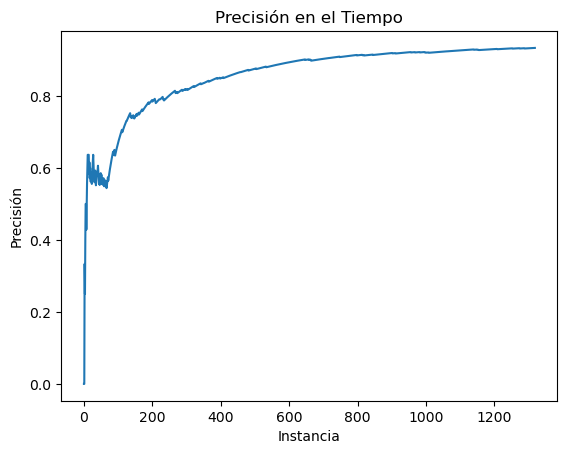

F1 Score: 0.00
MCC Score: 0.00


In [13]:
# Crear un gráfico de precisión en el tiempo
plt.plot(range(len(accuracies)), accuracies)
plt.xlabel("Instancia")
plt.ylabel("Precisión")
plt.title("Precisión en el Tiempo")
plt.show()

# Calcular métricas finales
print(f"F1 Score: {f1.get():.2f}")
print(f"MCC Score: {mcc.get():.2f}")

Este bloque de código genera un gráfico que muestra cómo cambia la precisión a lo largo del tiempo y calcula las métricas finales, incluyendo el puntaje F1 y el puntaje MCC.